## Customer Churn prediction Using Deep Learning (ANN)
In the Project im predicting the wheather a customer will stay or leave the service on the basis of different features.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

### Exploring and Cleaning of the data 

In [5]:
data.drop("customerID",axis=1,inplace = True)

In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### In data types for total charges its object which should be a numerical data

In [7]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
#Converted TotalCharges feature datatype from object to numerical data
data[pd.to_numeric(data.TotalCharges, errors = "coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
data.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
df = data[data.TotalCharges!=" "]

In [11]:
df.shape

(7032, 20)

In [12]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges)

<ipython-input-12-2c98fbfe946b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] = pd.to_numeric(df.TotalCharges)


In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df[df.Churn == "No"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [15]:
df.ch_no  = df[df.Churn == "No"].tenure
df.ch_yes = df[df.Churn == "Yes"].tenure

<ipython-input-15-65b508485ec6>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ch_no  = df[df.Churn == "No"].tenure
<ipython-input-15-65b508485ec6>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ch_yes = df[df.Churn == "Yes"].tenure


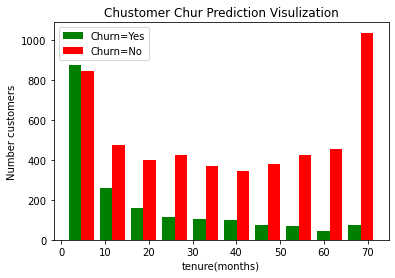

In [16]:
plt.hist([df.ch_yes, df.ch_no ],color = ("green","red"),label = ("Churn=Yes", "Churn=No"))

plt.xlabel("tenure(months)")
plt.ylabel("Number customers")
plt.title("Chustomer Chur Prediction Visulization")
plt.legend()

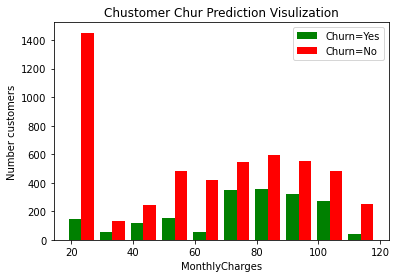

In [17]:
df.ch_no  = df[df.Churn == "No"].MonthlyCharges
df.ch_yes = df[df.Churn == "Yes"].MonthlyCharges

plt.hist([df.ch_yes, df.ch_no ],color = ("green","red"),label = ("Churn=Yes", "Churn=No"))

plt.xlabel("MonthlyCharges")
plt.ylabel("Number customers")
plt.title("Chustomer Chur Prediction Visulization")
plt.legend()

In [18]:
def print_unique_values(data):
    for col in df:
        if df[col].dtypes == "object":
            print(f'{col} : {df[col].unique()}')

In [19]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
df.replace("No phone service", "No", inplace=True)
df.replace("No internet service", "No", inplace=True)

C:\Users\pavan\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                  "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_columns:
    df[col].replace({"Yes":1,"No":0},inplace = True)

C:\Users\pavan\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [24]:
df["gender"].replace({"Male":1,"Female":0},inplace=True)

In [25]:
df1 = pd.get_dummies(df,drop_first = True)

In [26]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


In [27]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df1.shape

(7032, 24)

In [29]:
df1.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

### Feature Scaling

In [30]:
col_to_scale = ["MonthlyCharges","TotalCharges","tenure"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [31]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [32]:
df1["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

#### The dataset has imbalanced data, Now i have used SMOT for do oversampling of data

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
x = df1.drop("Churn",axis=1)
y = df1["Churn"]

In [35]:
over_sample = SMOTE()
x,y = over_sample.fit_resample(x,y)

In [36]:
from collections import Counter

count = Counter(y)
print(count)

Counter({0: 5163, 1: 5163})


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [39]:
x_train.shape

(8260, 23)

In [40]:
x_test.shape

(2066, 23)

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(23,),activation = "relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])
model.fit(x_train,y_train, epochs = 20)

Epoch 1/20
259/259 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.6847
Epoch 2/20
259/259 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7764
Epoch 3/20
259/259 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7837
Epoch 4/20
259/259 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7767
Epoch 5/20
259/259 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7779
Epoch 6/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7799
Epoch 7/20
259/259 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.7814
Epoch 8/20
259/259 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7745
Epoch 9/20
259/259 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7888
Epoch 10/20
259/259 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.7945

In [43]:
model.evaluate(x_test,y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8064


[0.43193528056144714, 0.8063891530036926]

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_pred[:5]

array([[0.02075937],
       [0.27474022],
       [0.5082168 ],
       [0.19831055],
       [0.0487203 ]], dtype=float32)

In [46]:
y_predict = []
for element in y_pred:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [47]:
y_predict[:10]

[0, 0, 1, 0, 0, 1, 1, 0, 0, 1]

In [48]:
y_test[:10]

6917    0
7023    1
2730    0
2030    0
3959    0
176     1
2774    1
4757    0
4503    0
3724    1
Name: Churn, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1006
           1       0.80      0.82      0.81      1060

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(33.0, 0.5, 'Truth')

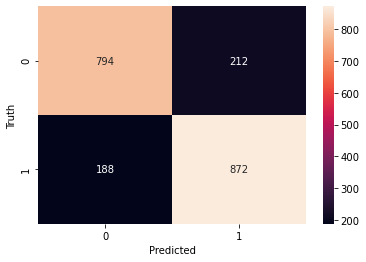

In [51]:
import seaborn as sn

cm = confusion_matrix(y_test,y_predict)
sn.heatmap(cm,annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

#### Accuracy 

In [56]:
round((795+872)/(212+188+872+749),2) #(TP+TN/FP+FN+TP+TN)

0.82

#### Precision

In [64]:
round((872)/(872+212),2) #For postive(1) (TP/TP+FP)

0.8

In [68]:
round((794)/(794+188),2) #For Negative(0) (TN/TN+FN)

0.81

#### Recall

In [65]:
round((872)/(872+188),2) #For positive(1) (TP/TP+FN)

0.82

In [67]:
round((794)/(794+212),2) #For Negative(0)(TN/TN+FP)

0.79